<a href="https://colab.research.google.com/github/Sunnnyyy16/Dacon_study/blob/main/Jeju_road/Jeju_road.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 제주도 도로 교통량 예측 AI 경진대회
대회사이트: https://dacon.io/competitions/official/235985/data

제주도 도로 교통량 예측 AI 알고리즘 개발
# 목차
0. 데이터로드
1. 데이터 EDA, visualization
2. 데이터 전처리
3. 모델 생성 및 학습
4. 제출
5. 결론

* 참고

https://dacon.io/competitions/official/235985/codeshare/7038?page=1&dtype=recent


In [ ]:
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 27 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 2s (3,877 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [ ]:
#visualization
import matplotlib as mpl
import matplotlib.pylab as plb
import matplotlib.pyplot as plt

# 브라우저에서 바로 그려지도록 
%matplotlib inline

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

# 0.데이터로드

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 메시지 숨기기
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
# import gc

# def csv_to_parquet(csv_path, save_name):
#     df = pd.read_csv(csv_path)
#     df.to_parquet(f'./{save_name}.parquet')
#     del df
#     gc.collect()
#     print(save_name, 'Done.')

In [ ]:
# csv_to_parquet('/gdrive/MyDrive/Dacon_study/Jeju_road/train.csv', 'train')
# csv_to_parquet('/gdrive/MyDrive/Dacon_study/Jeju_road/test.csv', 'test')

train Done.
test Done.


In [ ]:
!cp /gdrive/MyDrive/Dacon_study/Jeju_road/sample_submission.csv ./
!cp /gdrive/MyDrive/Dacon_study/Jeju_road/data_info.csv ./
!cp /gdrive/MyDrive/Dacon_study/Jeju_road/train.parquet ./
!cp //gdrive/MyDrive/Dacon_study/Jeju_road/test.parquet ./

## 데이터 불러오기

In [ ]:
train = pd.read_parquet('train.parquet')
test = pd.read_parquet('test.parquet')

In [ ]:
data_info= pd.read_csv('data_info.csv',encoding='utf8')
data_info

,변수명,변수 설명
0,id,아이디
1,base_date,날짜
2,day_of_week,요일
3,base_hour,시간대
4,road_in_use,도로사용여부
5,lane_count,차로수
6,road_rating,도로등급
7,multi_linked,중용구간 여부
8,connect_code,연결로 코드
9,maximum_speed_limit,최고속도제한


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701217 entries, 0 to 4701216
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   id                     object 
 1   base_date              int64  
 2   day_of_week            object 
 3   base_hour              int64  
 4   lane_count             int64  
 5   road_rating            int64  
 6   road_name              object 
 7   multi_linked           int64  
 8   connect_code           int64  
 9   maximum_speed_limit    float64
 10  vehicle_restricted     float64
 11  weight_restricted      float64
 12  height_restricted      float64
 13  road_type              int64  
 14  start_node_name        object 
 15  start_latitude         float64
 16  start_longitude        float64
 17  start_turn_restricted  object 
 18  end_node_name          object 
 19  end_latitude           float64
 20  end_longitude          float64
 21  end_turn_restricted    object 
 22  target            

* id 아이디 
* base_date 날짜
* day_of_week 요일
* base_hour 시간대
* lane_count 차로수
* road_rating 도로등급
* road_name 도로명
* multi_linked 중용구간 여부
* connect_code 연결로 코드
* maximum_speed_limit 최고속도제한
* vehicle_restricted 통과제한차량
* weight_restricted 통과제한하중
* height_restricted 통과제한높이
* road_type 도로유형
* start_latitude 시작지점의 위도
* start_longitude 시작지점의 경도
* start_turn_restricted 시작 지점의 회전제한 유무
* end_latitude 도착지점의 위도
* end_longitude 도착지점의 경도
* end_turn_restricted 도작지점의 회전제한 유무
* target 평균속도(km)

In [ ]:
print(train.shape)

(4701217, 23)


In [ ]:
train.head()

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,...,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,0,0,60.0,...,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,20211010,일,7,2,103,일반국도16호선,0,0,80.0,...,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,20220311,금,13,2,107,태평로,0,0,50.0,...,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,20211005,화,8,2,103,일반국도12호선,0,0,80.0,...,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0


In [ ]:
test.head()

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted
0,TEST_000000,20220825,목,17,3,107,연삼로,0,0,70.0,...,0.0,0,산지2교,33.499427,126.541298,없음,제주은행사거리,33.500772,126.543837,있음
1,TEST_000001,20220809,화,12,2,103,일반국도12호선,0,0,70.0,...,0.0,3,중문입구,33.258507,126.427003,없음,관광단지입구,33.258119,126.415840,없음
2,TEST_000002,20220805,금,2,1,103,일반국도16호선,0,0,60.0,...,0.0,0,도순3교,33.258960,126.476508,없음,도순2교,33.259206,126.474687,없음
3,TEST_000003,20220818,목,23,3,103,일반국도11호선,0,0,70.0,...,0.0,0,아라주공아파트,33.473494,126.545647,없음,인다마을,33.471061,126.545467,없음
4,TEST_000004,20220810,수,17,3,106,번영로,0,0,70.0,...,0.0,0,부록교 시종점,33.501477,126.569223,없음,봉개교 시종점,33.496863,126.581230,없음


In [ ]:
print(test.shape)

(291241, 22)


# 1.데이터 EDA, visualization

## data cleansing

In [ ]:
train.isnull().sum()

id                       0
base_date                0
day_of_week              0
base_hour                0
lane_count               0
road_rating              0
road_name                0
multi_linked             0
connect_code             0
maximum_speed_limit      0
vehicle_restricted       0
weight_restricted        0
height_restricted        0
road_type                0
start_node_name          0
start_latitude           0
start_longitude          0
start_turn_restricted    0
end_node_name            0
end_latitude             0
end_longitude            0
end_turn_restricted      0
target                   0
dtype: int64

In [ ]:
test.isnull().sum()

id                       0
base_date                0
day_of_week              0
base_hour                0
lane_count               0
road_rating              0
road_name                0
multi_linked             0
connect_code             0
maximum_speed_limit      0
vehicle_restricted       0
weight_restricted        0
height_restricted        0
road_type                0
start_node_name          0
start_latitude           0
start_longitude          0
start_turn_restricted    0
end_node_name            0
end_latitude             0
end_longitude            0
end_turn_restricted      0
dtype: int64

null값 없다

In [ ]:
train['vehicle_restricted'].value_counts()

0.0    4701217
Name: vehicle_restricted, dtype: int64

In [ ]:
train['height_restricted'].value_counts()

0.0    4701217
Name: height_restricted, dtype: int64

In [ ]:
train.drop(['id','vehicle_restricted','height_restricted'],axis=1, inplace = True)

## Data Visualization

In [ ]:
train['day_of_week'].value_counts().index

Index(['금', '수', '목', '일', '토', '화', '월'], dtype='object')

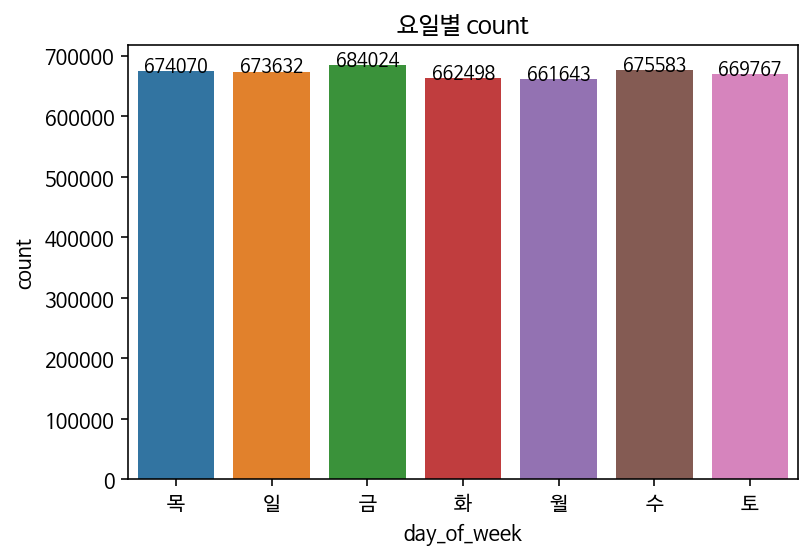

In [ ]:
ax= sns.countplot(x='day_of_week',data=train)

for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width() / 2., height + 100, height, ha = 'center', size = 9)

plt.title('요일별 count')
plt.show()

In [ ]:
train['base_hour'].value_counts().to_frame().reset_index()

,index,base_hour
0,15,214541
1,13,214297
2,14,214182
3,12,211833
4,19,209870
5,11,208515
6,16,208420
7,17,208377
8,18,207500
9,10,206316


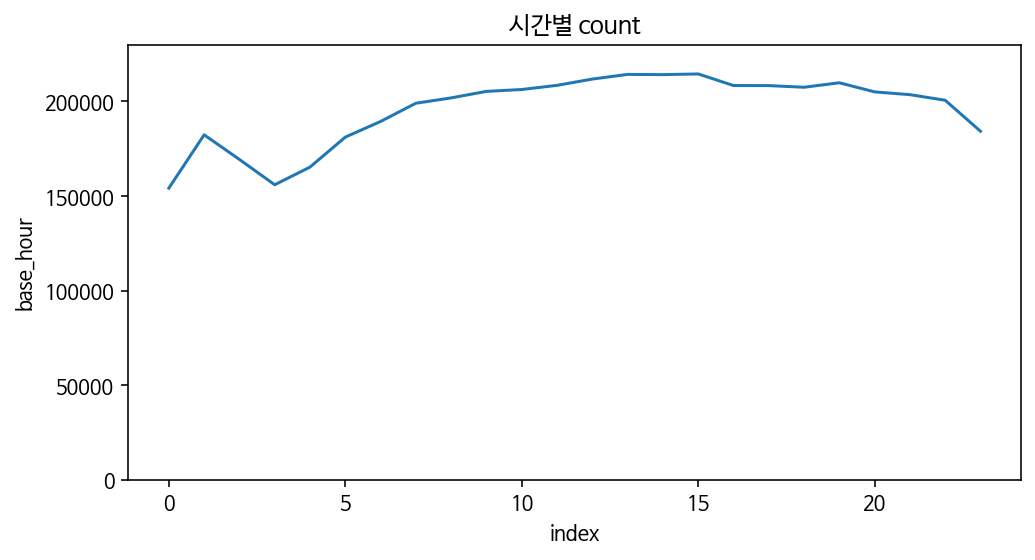

In [ ]:
plt.figure(figsize=(8,4))
sns.lineplot(x='index', y='base_hour',data=train['base_hour'].value_counts().to_frame().reset_index())
plt.ylim(0,230000)
plt.title('시간별 count')
plt.show()

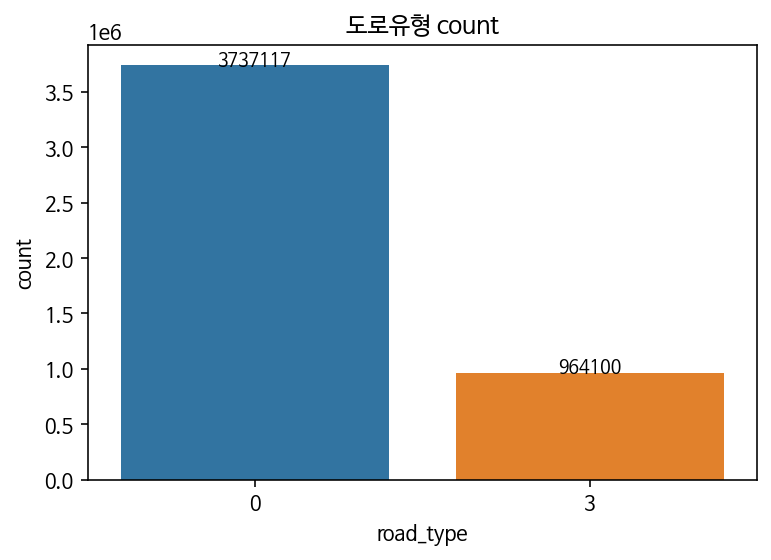

In [ ]:
ax= sns.countplot(x='road_type',data=train)

for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width() / 2., height + 100, height, ha = 'center', size = 9)

plt.title('도로유형 count')
plt.show()

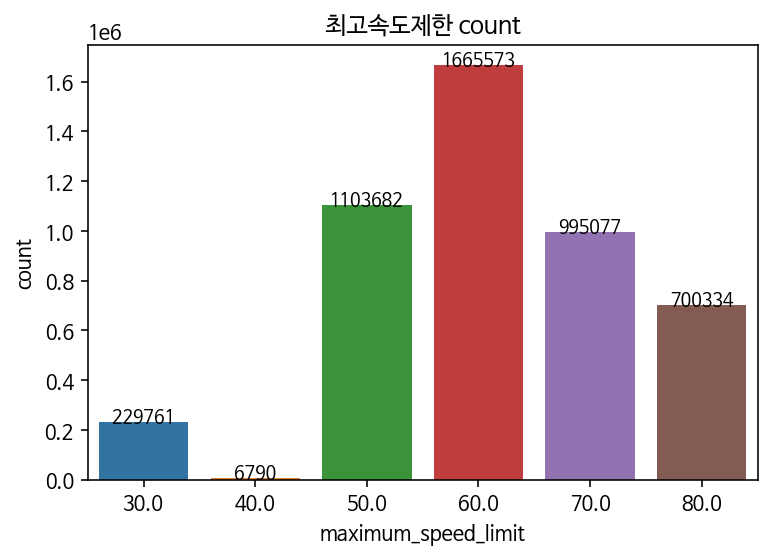

In [ ]:
ax= sns.countplot(x='maximum_speed_limit',data=train)

for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width() / 2., height + 100, height, ha = 'center', size = 9)

plt.title('최고속도제한 count')
plt.show()


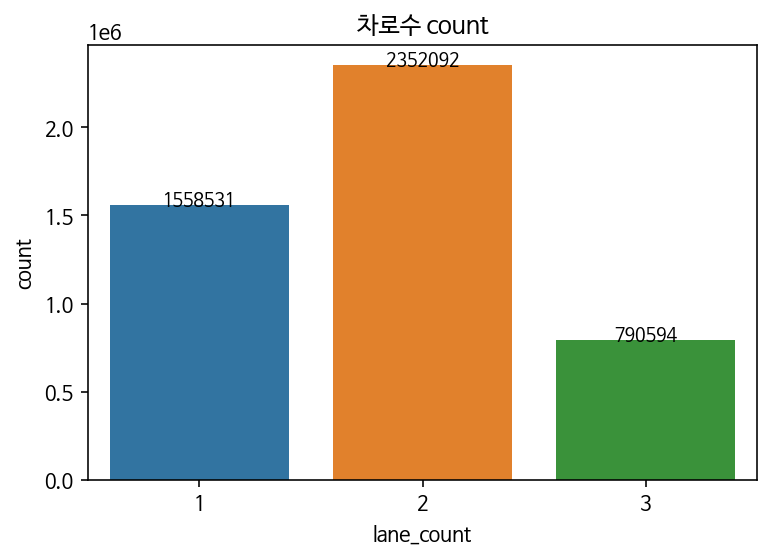

In [ ]:
ax= sns.countplot(x='lane_count',data=train)

for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width() / 2., height + 100, height, ha = 'center', size = 9)

plt.title('차로수 count')
plt.show()

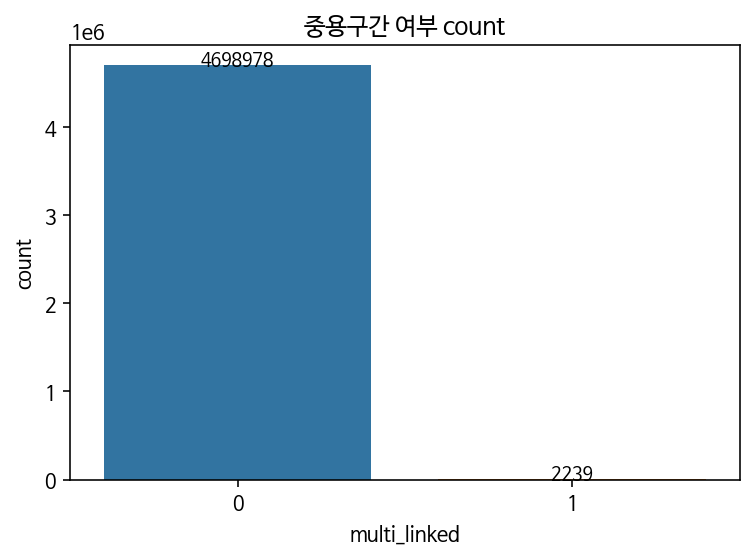

In [ ]:
ax= sns.countplot(x='multi_linked',data=train)

for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width() / 2., height + 100, height, ha = 'center', size = 9)

plt.title('중용구간 여부 count')
plt.show()

대부분의 도로가 중용구간을 사용하지 않음

In [ ]:
train['road_name'].value_counts()

일반국도12호선    1046092
-            569463
일반국도16호선     554510
일반국도95호선     248181
일반국도11호선     215701
             ...   
애원로            7718
아봉로            7342
남조로            6813
호서중앙로          2819
호근로             587
Name: road_name, Length: 61, dtype: int64

In [ ]:
train['start_turn_restricted'].value_counts()

없음    4239701
있음     461516
Name: start_turn_restricted, dtype: int64

In [ ]:
train['end_turn_restricted'].value_counts()

없음    4239599
있음     461618
Name: end_turn_restricted, dtype: int64

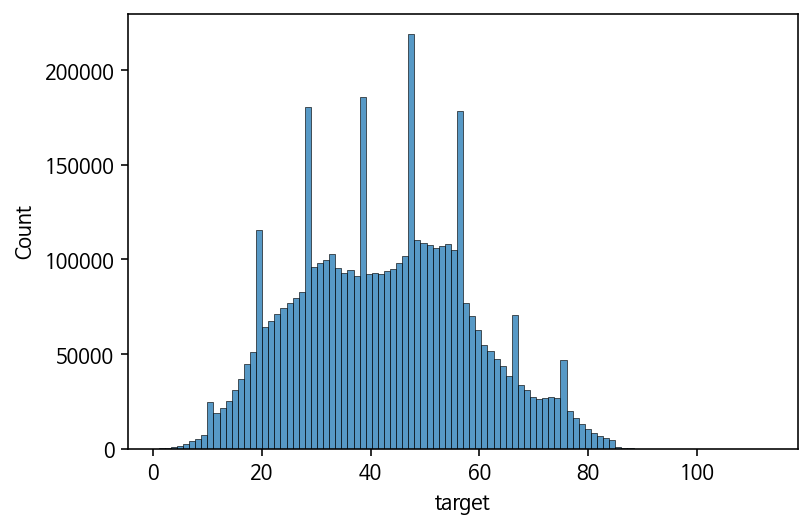

In [ ]:
plt.figure()
sns.histplot(train['target'], bins=100)
plt.show()

In [ ]:
# # date 타입으로 변경
# train['base_date'] = train['base_date'].astype(object)
# train['base_date'] = pd.to_datetime(train['base_date'],format='%Y%m%d')
# train.head()

,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,weight_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,2022-06-23,목,17,1,106,지방도1112호선,0,0,60.0,32400.0,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,2022-07-28,목,21,2,103,일반국도11호선,0,0,60.0,0.0,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,2021-10-10,일,7,2,103,일반국도16호선,0,0,80.0,0.0,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,2022-03-11,금,13,2,107,태평로,0,0,50.0,0.0,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,2021-10-05,화,8,2,103,일반국도12호선,0,0,80.0,0.0,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0


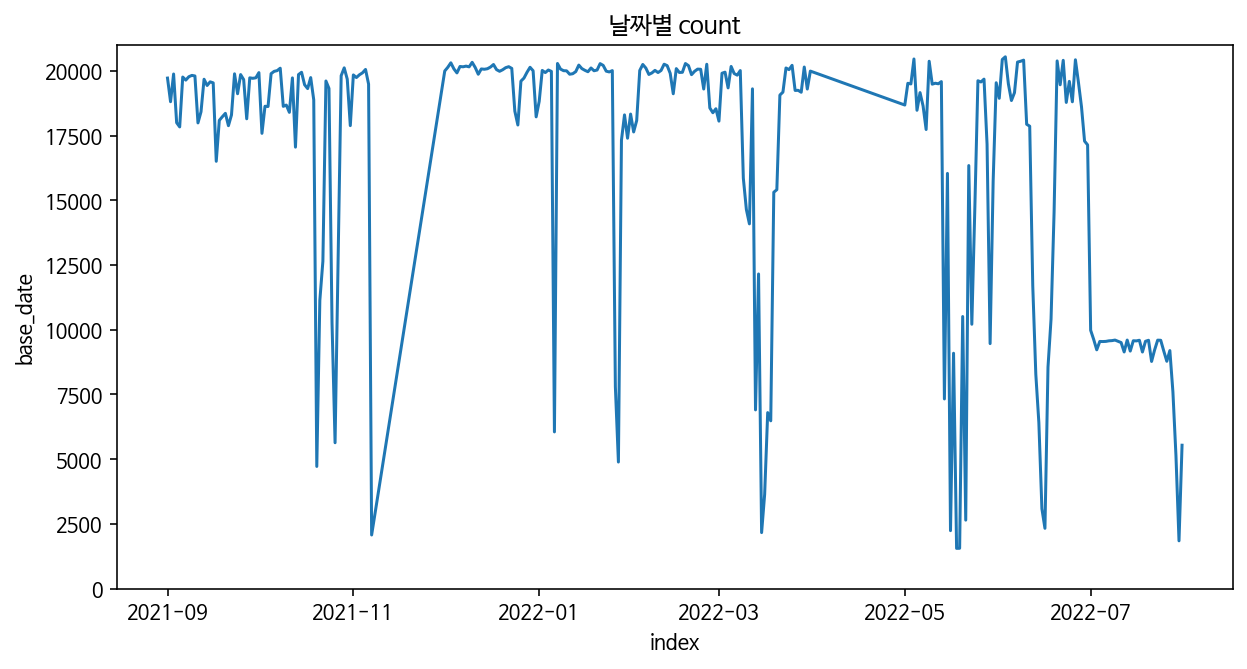

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(x='index', y='base_date',data=train['base_date'].value_counts().to_frame().reset_index())
plt.ylim(0,21000)
plt.title('날짜별 count')
plt.show()

# 2.데이터 전처리

## start_node_name과 end_node_name을 key값으로 라벨인코딩

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
train['node_combination'] = train['start_node_name'] + '_' + train['end_node_name']
test['node_combination'] = test['start_node_name'] + '_' + test['end_node_name']

In [ ]:
train['node_combination'] = encoder.fit_transform(train['node_combination'])

In [ ]:
# train 셋에서 만든 라벨이 test셋에 없을 경우
for category in np.unique(test['node_combination']) :
    if category not in encoder.classes_ :
        encoder.classes_ = np.append(encoder.classes_, label)
test['node_combination'] = encoder.transform(test['node_combination'])

## 요일 라벨인코딩

In [ ]:
train['day_of_week'] = encoder.fit_transform(train['day_of_week'])

In [ ]:
for category in np.unique(test['day_of_week']) :
    if category not in encoder.classes_ :
        encoder.classes_ = np.append(encoder.classes_, label)
test['day_of_week'] = encoder.transform(test['day_of_week'])

## 위경도 좌표로 clustering(Kmeans)

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters =6, max_iter = 1000, random_state =42, n_init=15)

In [ ]:
train['gps_cls'] = kmeans.fit_predict(train[['start_latitude', 'start_longitude', 'end_latitude', 'end_longitude']])
test['gps_cls'] = kmeans.predict(test[['start_latitude', 'start_longitude', 'end_latitude', 'end_longitude']])

## 공휴일 기간
* 공휴일 기준 1-2일 추가해 binary 화

In [ ]:
train['base_date'] = train['base_date'].astype(str)
test['base_date'] = test['base_date'].astype(str)

In [ ]:
train['date'] = train['base_date'].str[4:]
test['date'] = test['base_date'].str[4:]

In [ ]:
h_days = ['1231', '0101', '0102', '0129', '0130', '0131', '0201', '0202', '0228', '0229', '0230', '0301', '0302', 
          '0505', '0506', '0507', '0508', '0605', '0607', '0606', '0814', '0815', '0816', '0920', '0921', '0504',
          '0922', '1002', '1003', '1004', '1008', '1009', '1010', '1224', '1225', '1226']

In [ ]:
train['in_h_days'] = train['date'].isin(h_days)
test['in_h_days'] = test['date'].isin(h_days)

## 날짜에서 연도, 월 추출

In [ ]:
train['base_date'] = pd.to_datetime(train['base_date'])
test['base_date'] = pd.to_datetime(test['base_date'])

In [ ]:
train['year'] = train['base_date'].dt.year
test['year'] = test['base_date'].dt.year

In [ ]:
train['month'] = train['base_date'].dt.month
test['month'] = test['base_date'].dt.month

## 계절 변수 생성

In [ ]:
def get_season(x) :
    
    if x in [9, 10, 11] :
        return 3
    elif x in [12, 1, 2] :
        return 2
    elif x in [3, 4, 5, 6] :
        return 1
    else :
        return 0

In [ ]:
train['season'] = train['month'].apply(get_season)
test['season'] = test['month'].apply(get_season)

## 도로명 라벨인코딩

In [ ]:
train['road_name'] = encoder.fit_transform(train['road_name'])

In [ ]:
for category in np.unique(test['road_name']) :
    if category not in encoder.classes_ :
        encoder.classes_ = np.append(encoder.classes_, label)
test['road_name'] = encoder.transform(test['road_name'])

## 시작노드 == 종료 노드 관련 피처 생성

In [ ]:
train['node_same'] = train['start_node_name'] == train['end_node_name']
test['node_same'] = test['start_node_name'] == test['end_node_name']

## 기타 칼럼 라벨인코딩

In [ ]:
# start_turn_restricted 라벨인코딩
train['start_turn_restricted'] = encoder.fit_transform(train['start_turn_restricted'])

In [ ]:
for category in np.unique(test['start_turn_restricted']) :
    if category not in encoder.classes_ :
        encoder.classes_ = np.append(encoder.classes_, label)
test['start_turn_restricted'] = encoder.transform(test['start_turn_restricted'])

In [ ]:
# end_turn_restricted 라벨인코딩
train['end_turn_restricted'] = encoder.fit_transform(train['end_turn_restricted'])

In [ ]:
for category in np.unique(test['end_turn_restricted']) :
    if category not in encoder.classes_ :
        encoder.classes_ = np.append(encoder.classes_, label)
test['end_turn_restricted'] = encoder.transform(test['end_turn_restricted'])

# 3.모델 생성 및 학습

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_absolute_error, mean_squared_error
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [ ]:
train.drop(['start_node_name', 'end_node_name', 'date', 'base_date'], axis = 1, inplace = True)
test.drop(['start_node_name', 'end_node_name', 'date', 'base_date'], axis = 1, inplace = True)

In [ ]:
X = train.drop(['target'],axis=1)
y =train.target

In [ ]:
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(X,y, test_size=.20, random_state=42)

In [ ]:
target = test[X.columns]

## Stratified KFold

* 10 Stratified KFold 진행

In [ ]:
skf = StratifiedKFold(n_splits = 10, random_state = 42, shuffle = True)

In [ ]:
standard= X['day_of_week']

## CatBoost

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 14.7 MB/s eta 0:00:00


In [ ]:
# 모델링 라이브러리
import catboost as cat
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error

In [ ]:
cat_pred = np.zeros(target.shape[0])
i = 0
cat_mae = []

for tr_idx, val_idx in skf.split(X, standard):
    
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y.iloc[val_idx]

    cat = CatBoostRegressor(max_depth = 8, learning_rate = 0.033, use_best_model = True, iterations = 100, eval_metric = 'MAE')

    cat.fit(tr_x, tr_y, eval_set = [(tr_x, tr_y), (val_x, val_y)], early_stopping_rounds = 5, verbose = 2500)

    val_pred = cat.predict(val_x).astype(int)
    fold_mae = mean_absolute_error(val_y, val_pred)
    cat_mae.append(fold_mae)
    print(f"{i + 1} Fold MAE = {fold_mae}")

    i += 1

    fold_pred = cat.predict(target) / skf.n_splits
    cat_pred += fold_pred

print(f"\nAVG of MAE = {np.mean(cat_mae)}")

0:	learn: 12.9530103	test: 12.9530103	test1: 12.9417618	best: 12.9417618 (0)	total: 1.28s	remaining: 2m 6s
99:	learn: 6.3472373	test: 6.3472373	test1: 6.3514706	best: 6.3514706 (99)	total: 1m 32s	remaining: 0us

bestTest = 6.351470629
bestIteration = 99

1 Fold MAE = 6.394601826759862
0:	learn: 12.9497923	test: 12.9497923	test1: 12.9626104	best: 12.9626104 (0)	total: 789ms	remaining: 1m 18s
99:	learn: 6.3284491	test: 6.3284491	test1: 6.3393925	best: 6.3393925 (99)	total: 1m 28s	remaining: 0us

bestTest = 6.339392532
bestIteration = 99

2 Fold MAE = 6.377221231935541
0:	learn: 12.9463385	test: 12.9463385	test1: 12.9679530	best: 12.9679530 (0)	total: 819ms	remaining: 1m 21s
99:	learn: 6.3588213	test: 6.3588213	test1: 6.3691712	best: 6.3691712 (99)	total: 1m 28s	remaining: 0us

bestTest = 6.36917125
bestIteration = 99

3 Fold MAE = 6.406024393668027
0:	learn: 12.9530976	test: 12.9530976	test1: 12.9414932	best: 12.9414932 (0)	total: 786ms	remaining: 1m 17s
99:	learn: 6.3570848	test: 6.3570

In [ ]:
np.save('./cat_pred', cat_pred)

## XGBoost

In [ ]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 KB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 KB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 9.4 MB/s eta 0:00:00


In [ ]:
# Optuna Libraries
import optuna
from optuna import Trial, visualization
from optuna.samplers import TPESampler

In [ ]:
# random sampler
sampler = TPESampler(seed=10)

# define function
def objective(trial):

    param = {
        'objective': 'reg:squarederror',
        'verbose': -1,
        'tree_method':'gpu_hist',
        'predictor':'gpu_predictor',
        'metric': 'mae', 
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0),
        'reg_alpha': trial.suggest_uniform('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_uniform('reg_lambda', 0.0, 3.0),
        'max_depth': trial.suggest_int('max_depth',3, 15),
        'learning_rate': trial.suggest_loguniform("learning_rate", 0.0001, 0.99),
        'n_estimators': trial.suggest_int('n_estimators', 300, 1000),
        'min_child_weight': trial.suggest_int('min_child_weight', 2, 10),
        'subsample': trial.suggest_loguniform('subsample', 0.4, 1),
    }

    # Generate model
    model_xgb = XGBRegressor(**param)
    model_xgb = model_xgb.fit(train_x, train_y, eval_set=[(val_x, val_y)], 
                           verbose=0, early_stopping_rounds=25)
                           
    # * 평가 지표
    # 원하는 평가 지표에 따라 사용하기                        
    MAE = mean_absolute_error(val_y, model_xgb.predict(val_x))
    return MAE

optuna_xgb = optuna.create_study(direction='minimize', sampler=sampler)

# * n_trials의 경우 optuna를 몇번 실행하여 hyper parameter를 찾을 것인지를 정한다.
optuna_xgb.optimize(objective, n_trials=10)

[I 2023-02-05 12:43:39,511] A new study created in memory with name: no-name-f0e0ed1d-5f96-4e7a-9f44-8bb6a92098e9
[I 2023-02-05 12:45:29,229] Trial 0 finished with value: 3.5171266169167494 and parameters: {'colsample_bytree': 0.9313961929800239, 'reg_alpha': 0.0207519493594015, 'reg_lambda': 1.9009447047788264, 'max_depth': 12, 'learning_rate': 0.009814138060034883, 'n_estimators': 457, 'min_child_weight': 3, 'subsample': 0.8029815922829752}. Best is trial 0 with value: 3.5171266169167494.
[I 2023-02-05 12:48:01,813] Trial 1 finished with value: 39.50374599824821 and parameters: {'colsample_bytree': 0.7507332509687606, 'reg_alpha': 0.08833981417401027, 'reg_lambda': 2.056079455103392, 'max_depth': 15, 'learning_rate': 0.00010369930169788347, 'n_estimators': 659, 'min_child_weight': 9, 'subsample': 0.7011462565718398}. Best is trial 0 with value: 3.5171266169167494.
[I 2023-02-05 12:49:38,805] Trial 2 finished with value: 3.359110244675721 and parameters: {'colsample_bytree': 0.9165265

In [ ]:
xgb_trial = optuna_xgb.best_trial
xgb_trial_params = xgb_trial.params
print('Best Trial: score {},\nparams {}'.format(xgb_trial.value, xgb_trial_params))

Best Trial: score 3.283842751712625,
params {'colsample_bytree': 0.8325499523268988, 'reg_alpha': 0.4340139933332937, 'reg_lambda': 1.8533009354079515, 'max_depth': 9, 'learning_rate': 0.03969628551462024, 'n_estimators': 721, 'min_child_weight': 9, 'subsample': 0.6451255817003931}


Best Trial: score 3.283842751712625,

params {'colsample_bytree': 0.8325499523268988, 'reg_alpha': 0.4340139933332937, 'reg_lambda': 1.8533009354079515, 'max_depth': 9, 'learning_rate': 0.03969628551462024, 'n_estimators': 721, 'min_child_weight': 9, 'subsample': 0.6451255817003931}

In [ ]:
# optuna로 얻은 best parameters
xgb_trial_params = {'objective': 'reg:squarederror',
                    'metric': 'mae', 
                    'colsample_bytree': 0.8325499523268988, 
                    'reg_alpha': 0.4340139933332937, 
                    'reg_lambda': 1.8533009354079515, 
                    'max_depth': 9, 
                    'learning_rate': 0.03969628551462024, 
                    'n_estimators': 721, 
                    'min_child_weight': 9, 
                    'subsample': 0.6451255817003931,
                    'tree_method':'gpu_hist',
                    'predictor':'gpu_predictor'}

In [ ]:
xgb_pred = np.zeros(target.shape[0])
i = 0
xgb_mae = []

for tr_idx, val_idx in skf.split(X,standard):
    
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y.iloc[val_idx]

    xgb = XGBRegressor(**xgb_trial_params)
    xgb.fit(tr_x, tr_y, eval_set = [(tr_x, tr_y), (val_x, val_y)], early_stopping_rounds = 8, verbose = 1000, eval_metric = 'mae')

    val_pred = xgb.predict(val_x).astype(int)
    fold_mae = mean_absolute_error(val_y, val_pred)
    xgb_mae.append(fold_mae)
    print(f"{i + 1} Fold MAE = {fold_mae}")

    i += 1

    fold_pred = xgb.predict(target) / skf.n_splits
    xgb_pred += fold_pred

print(f"\nAVG of MAE = {np.mean(xgb_mae)}")

[0]	validation_0-mae:40.6196	validation_1-mae:40.5697
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 8 rounds.
[720]	validation_0-mae:3.28076	validation_1-mae:3.30613
1 Fold MAE = 3.3610722323141653
[0]	validation_0-mae:40.6128	validation_1-mae:40.631
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 8 rounds.
[720]	validation_0-mae:3.26243	validation_1-mae:3.29245
2 Fold MAE = 3.3464100807875403
[0]	validation_0-mae:40.6188	validation_1-mae:40.5768
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 8 rounds.
[720]	validation_0-mae:3.24894	validation_1-mae:3.27191
3 Fold MAE = 3.326861963490328
[0]	validation_0-mae:40.6099	validation_1-mae:40.6587
Multiple eval metrics have been passed: 'validation_1-

In [ ]:
np.save('./xgb_pred', xgb_pred)

# 4.제출

In [ ]:
submission = pd.read_csv('sample_submission.csv')

In [ ]:
### CatBoost
cat_pred = np.load('./cat_pred.npy')

### XGBoost
xgb_pred = np.load('./xgb_pred.npy')

In [ ]:
submission.loc[target.index, 'target'] = xgb_pred * 0.8 + cat_pred * 0.2

In [ ]:
submission['target'] = round(submission['target'], 0)
submission.to_csv('cat_xgb.csv', index = False)

# 5. 결론
스코어 기준: MAE
1. 23.02.09 제출 스코어:3.68979
* 사용모델: XGBoostRegressor + CatBoostRegressor
* 전처리: feature engineering(label encoding, clustering 등)
* 하이퍼파라미터튜닝: optuna
* validation: StratifiedKFold 10

## 한계점 및 발전방안
* Data leakage 발생하지 않도록 전처리, 모델링 구성해야 함.
* 제주도 외부데이터를 사용 시 성능 향상 기대된다.